In [115]:
"""
@author: joey
@time: 2020/06/19
"""


'\n@author: joey\n@time: 2020/06/19\n'

In [116]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style='ticks',context='poster')


In [117]:
SEED = 222
np.random.seed(SEED)

In [118]:
%%time
filepath = '/Users/joey/Documents/PycharmProjects/mywork/decision tree/science_federal_giving.csv'
df = pd.read_csv(filepath)


<string>:2: DtypeWarning: Columns (0,1,2,3,4,5,6,7,9,10,11,12,13,14,15,16,17,18,19,20,25,26,28,29) have mixed types.Specify dtype option on import or set low_memory=False.


CPU times: user 2.95 s, sys: 471 ms, total: 3.42 s
Wall time: 3.6 s


In [119]:
filepath = '/Users/joey/Documents/PycharmProjects/mywork/decision tree/science_federal_giving.csv'
df = pd.read_csv(filepath, nrows=3000)
df.head()

,cmte_nm,cmte_id,cmte_tp,cmte_pty,cand_name,cand_pty_affiliation,cand_office_st,cand_office,cand_office_district,cand_status,...,transaction_dt,cycle,transaction_amt,2016_dollars,other_id,tran_id,file_num,memo_cd,memo_text,sub_id
0,AMERICAN WAY - DURANT 2012; THE,C00501452,S,REP,"DURANT, CLARK",REP,MI,S,0.0,C,...,3302012,2012,2500,2612.50,NaN,SA0108160812336,845273,NaN,NaN,1.010000e+18
1,A LOT OF PEOPLE FOR DAVE OBEY,C00017830,H,DEM,"OBEY, DAVID R",DEM,WI,H,7.0,C,...,4182007,2008,250,292.50,NaN,C34559,294636,NaN,NaN,4.070000e+18
2,A WHOLE LOT OF PEOPLE FOR GRIJALVA CONGRESSION...,C00374058,H,DEM,"GRIJALVA, RAUL M",DEM,AZ,H,3.0,C,...,6092016,2016,50,50.00,C00401224,VSH8VCDY4S4,1096417,NaN,* EARMARKED CONTRIBUTION: SEE BELOW,4.080000e+18
3,A WHOLE LOT OF PEOPLE FOR GRIJALVA CONGRESSION...,C00374058,H,DEM,"GRIJALVA, RAUL M",DEM,AZ,H,3.0,C,...,8192012,2012,2500,2612.50,NaN,C6548162,863428,NaN,NaN,4.030000e+18
4,A WHOLE LOT OF PEOPLE FOR GRIJALVA CONGRESSION...,C00374058,H,DEM,"GRIJALVA, RAUL M",DEM,AZ,H,7.0,C,...,10292010,2010,250,273.25,NaN,C5156783,863417,NaN,NaN,4.030000e+18


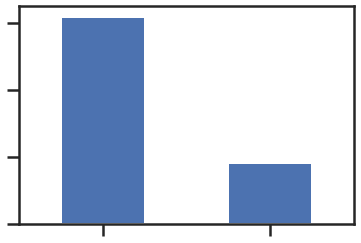

In [120]:
df1 = df.drop(df[df.cand_pty_affiliation.isin(['IND','LIB'])].index)
# df1.cand_pty_affiliation.value_counts(normalize=True)
df1.cand_pty_affiliation.value_counts(normalize=True).plot(kind='bar', title='Share of No.donations')
# normalize 百分比

In [121]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

def get_tarin_test(test_size=0.95):
    """split data into train and test sets"""
    df1 = df.drop(df[df.cand_pty_affiliation.isin(['IND','LIB'])].index)
    y = 1 * (df1.cand_pty_affiliation == 'REP') # 转换类型为0和1
    X = df1.drop(['cand_pty_affiliation','cand_office_district'], axis=1)
    X = X.dropna(axis=1)
    X = pd.get_dummies(X, sparse=True) # 字母属性转换为数字
    X.drop(X.columns[X.std() == 0], axis=1, inplace=True)
    print(y.shape,X.shape)
    return train_test_split(X, y, test_size=test_size, random_state=SEED)
a, b, c, d = get_tarin_test()

(2983,) (2983, 5248)


In [122]:
xtrain, xtest, ytrain, ytest = a, b, c, d

In [123]:
# def get_train_test(test_size=0.95):
#     """Split Data into train and test sets."""
#     y = 1 * (df.cand_pty_affiliation == "REP")
#     X = df.drop(["cand_pty_affiliation"], axis=1)
#     X = pd.get_dummies(X, sparse=True)
#     X.drop(X.columns[X.std() == 0], axis=1, inplace=True)
#     return train_test_split(X, y, test_size=test_size, random_state=SEED)
#
# xtrain, xtest, ytrain, ytest = get_train_test()

In [124]:
xtrain.head()

,transaction_dt,cycle,transaction_amt,file_num,sub_id,cmte_nm_10TH DISTRICT REPUBLICAN CONGRESSIONAL COMMITTEE,cmte_nm_2010 SENATE VICTORY COMMITTEE,cmte_nm_7TH DISTRICT REPUBLICAN COMMITTEE,cmte_nm_8TH DISTRICT REPUBLICAN COMMITTEE (VA),cmte_nm_A LOT OF PEOPLE FOR DAVE OBEY,...,tran_id_VR029K0CR11,tran_id_VR029K0CYP0,tran_id_VR029K1W9R9,tran_id_VR029K5TBS2,tran_id_VR029K5TZB4,tran_id_VSH8VCDY4S4,tran_id_VSH8VCRD2Y7,tran_id_VSH8VD4TVD5,tran_id_VSH8VDAFQ85,tran_id_VSHD3D7P3N2
374,6142007,2008,1000,358433,2.080000e+18,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1817,9122011,2012,500,756173,4.010000e+18,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1763,10242010,2010,400,705217,1.020000e+18,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1031,10142015,2016,25,1048989,2.020000e+18,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
883,7312016,2016,10,1114315,2.110000e+18,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [125]:
import pydotplus
from IPython.display import Image
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier, export_graphviz

def print_graph(clf, feature_names):
    graph = export_graphviz(clf,label='root',proportion=True,out_file=None,feature_names=feature_names,
                            class_names={0:'D',1:'R'},filled=True,rounded=True)
    graph = pydotplus.graph_from_dot_data(graph)
    return Image(graph.create_png())

/Users/joey/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:510: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  "pandas.DataFrame with sparse columns found."
/Users/joey/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:510: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  "pandas.DataFrame with sparse columns found."


decision tree ROC-AUC score: 0.784


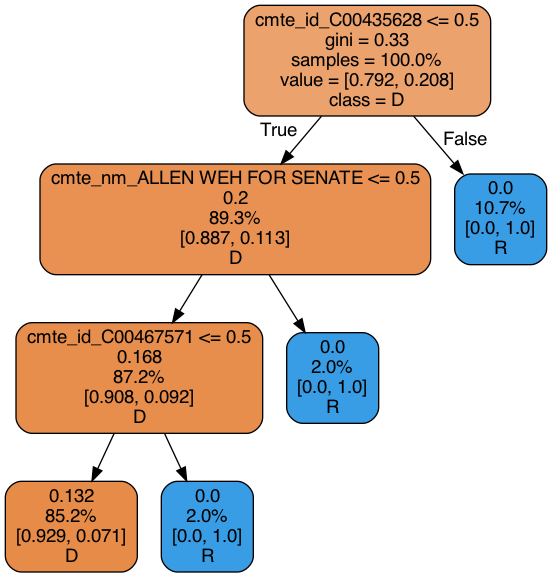

In [126]:
t1 = DecisionTreeClassifier(max_depth=3,random_state=SEED)
t1.fit(xtrain, ytrain)
p1 = t1.predict_proba(xtest)[:,1]
print("decision tree ROC-AUC score: %.3f" % roc_auc_score(ytest, p1))

print_graph(t1,xtrain.columns)

/Users/joey/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:510: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  "pandas.DataFrame with sparse columns found."
/Users/joey/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:510: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  "pandas.DataFrame with sparse columns found."


decision tree ROC-AUC score: 0.784


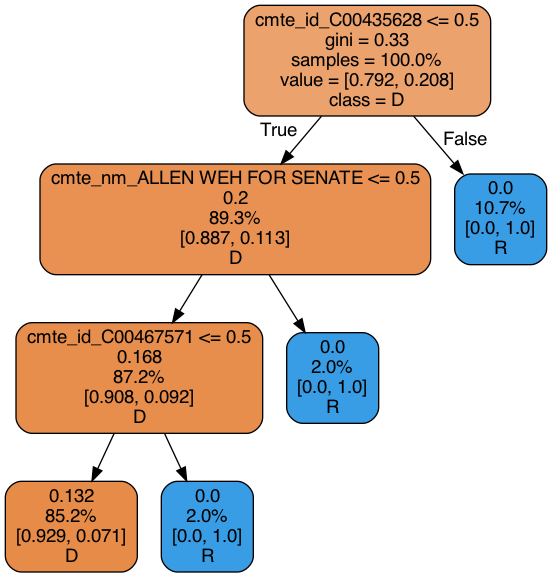

In [127]:
drop = ['transaction_amt']
xtrain_slim = xtrain.drop(drop,1)
xtest_slim = xtest.drop(drop,1)

t3 = DecisionTreeClassifier(max_depth=3,random_state=SEED)
t3.fit(xtrain_slim, ytrain)
p2 = t3.predict_proba(xtest_slim)[:,1]
print("decision tree ROC-AUC score: %.3f" % roc_auc_score(ytest,p2))
print_graph(t3,xtrain_slim.columns)

In [128]:
p = np.mean([p1,p2],axis=0)
print("decision tree ROC-AUC score: %.3f" % roc_auc_score(ytest,p))

decision tree ROC-AUC score: 0.784


In [129]:
# 随机森林
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=10, max_features=3, random_state=SEED)
rf.fit(xtrain, ytrain)
p = rf.predict_proba(xtest)[:,1]
print("decision tree ROC-AUC score: %.3f" % roc_auc_score(ytest,p))


/Users/joey/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:510: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  "pandas.DataFrame with sparse columns found."
/Users/joey/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:510: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  "pandas.DataFrame with sparse columns found."


decision tree ROC-AUC score: 0.926


In [130]:
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.kernel_approximation import Nystroem, RBFSampler
from sklearn.pipeline import make_pipeline

def get_models():
    """Generate a library of base learners"""
    nb = GaussianNB()
    svc = SVC(C=100, probability=True)
    knn = KNeighborsClassifier(n_neighbors=3)
    lr = LogisticRegression(C=100, random_state=SEED, solver='liblinear', max_iter=3000)
    nn = MLPClassifier((80, 10), early_stopping=False, random_state=SEED)
    gb = GradientBoostingClassifier(n_estimators=100, random_state=SEED)
    rf = RandomForestClassifier(n_estimators=10, max_features=3, random_state=SEED)

    models = {'svm': svc, 'knn': knn, 'naive bayes': nb, 'mlp-nn':nn, 'random forest': rf, 'gbm': gb, 'logistic': lr}
    print('-'* 10)
    return models

In [131]:
print(type(xtrain),type(ytrain))

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>


In [132]:
def train_predict(models_list):
    """Fit models in list on training set and return preds"""
    P = np.zeros((ytest.shape[0], len(models_list)))
    P = pd.DataFrame(P)

    print('Fitting models')
    cols = list()
    for i, (name, m) in enumerate(models_list.items()):
        print('%s...'% name, end=' ', flush=False)
        m.fit(xtrain, ytrain)
        P.iloc[:,i] = m.predict_proba(xtest)[:,1]
        cols.append(name)
        print('done')
    P.columns = cols
    print('done!')
    print('-'* 10)
    return P

In [133]:
def score_models(P, ytest):
    """Score model in prediction DF"""
    print('Scoring models')
    for m in P.columns:
        score = roc_auc_score(ytest, P.loc[:,m])
        print('%s score is %.3f' % (m, score))
    print('done!')
    print('-'* 10)

In [134]:
models_list = get_models()
P = train_predict(models_list)
score_models(P,ytest)


----------
Fitting models
svm... done
knn... done
naive bayes... done
mlp-nn... done
random forest... done
gbm... done
logistic... done
done!
----------
Scoring models
svm score is 0.708
knn score is 0.762
naive bayes score is 0.605
mlp-nn score is 0.500
random forest score is 0.926
gbm score is 0.960
logistic score is 0.395
done!
----------


/Users/joey/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:510: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  "pandas.DataFrame with sparse columns found."
/Users/joey/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:510: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  "pandas.DataFrame with sparse columns found."
/Users/joey/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:510: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  "pandas.DataFrame with sparse columns found."
/Users/joey/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:510: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  "pandas.DataFrame with sparse columns found."
/Users/joey/opt/anaconda3/lib/python3.7/site-packages/sk

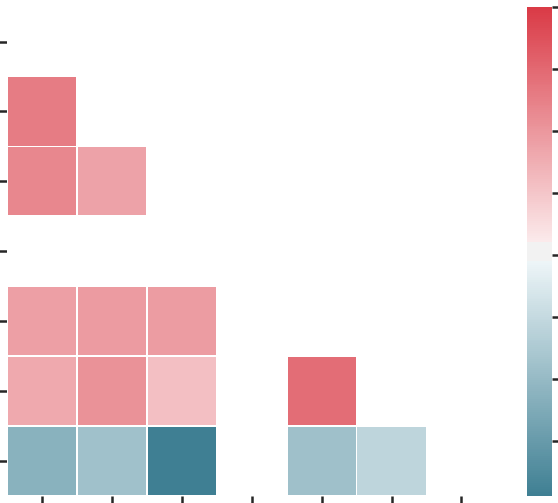

In [135]:
# 相关矩阵
from mlens.visualization import corrmat
corrmat(P.corr(), inflate=False)

In [136]:
print('Ensemble ROC-AUC score is : %.3f' % roc_auc_score(ytest, P.mean(axis=1)))

Ensemble ROC-AUC score is : 0.915


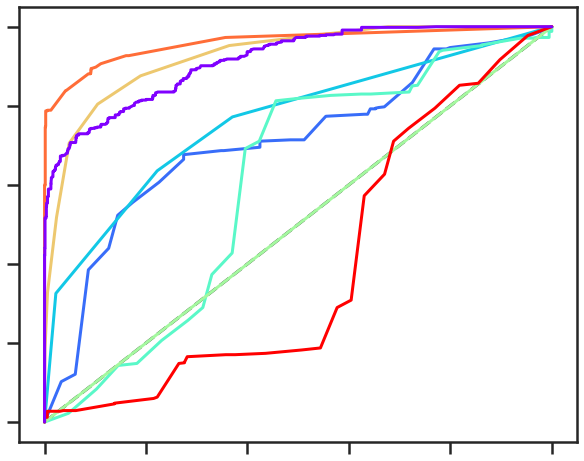

In [137]:
from sklearn.metrics import roc_curve

def plot_roc_curve(ytest, P_base_learners=None, P_ensembel=None, labels=None, ens_label=None):
    """Plot the roc curve for base learners and ensemble"""
    plt.figure(figsize=(10,8))
    plt.plot([0, 1], [0, 1], 'k--')

    cm = [plt.cm.rainbow(i) for i in np.linspace(0, 1, P_base_learners.shape[1] + 1)]

    for i in range(P_base_learners.shape[1]):
        p = P_base_learners[:, i]
        fpr, tpr, _ = roc_curve(ytest, p)
        plt.plot(fpr, tpr, label=labels[i], c=cm[i + 1])

    fpr, tpr, _ = roc_curve(ytest, P_ensembel)
    plt.plot(fpr, tpr, label=ens_label, c=cm[0])

    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('ROC curve')


plot_roc_curve(ytest, P.values, P.mean(axis=1), list(P.columns), 'ensemble')

Text(0, 0.9, 'True share republicans')

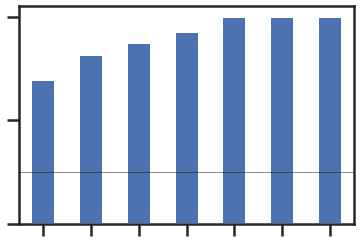

In [138]:
p = P.apply(lambda x: 1*(x >= 0.5).value_counts(normalize=True))
p.index = ['DEM', 'REP']
p.loc['DEM', :].sort_values().plot(kind='bar')
plt.axhline(0.25, color='k', linewidth=0.5)
plt.text(0, 0.9, 'True share republicans')

In [139]:
include = [c for c in P.columns if c not in ['naive bayes']]
print('Truncated ensemble ROC-AUC score is : %.3f' % roc_auc_score(ytest, P.loc[:, include].mean(axis=1)))


Truncated ensemble ROC-AUC score is : 0.919


In [140]:
#每个模型设置对应的权重，更加科学

# 1.定义基础模型
base_learners = get_models()

# 2.定义我们的权重分配模型（第二层架构）
meta_learner = GradientBoostingClassifier(n_estimators=1000, loss='exponential', max_features=4, max_depth=3,
                                          subsample=0.5, learning_rate=0.005, random_state=SEED) # 分类器
# 3.将基础模型分为2部分，主要供第二层使用
xtrain_base1, xpred_base1, ytrain_base1, ypred_base = train_test_split(xtrain, ytrain, test_size=0.5, random_state=SEED)
xtrain_base = xtrain_base1.fillna(value=0)
ytrain_base = ytrain_base1.fillna(value=0)
xpred_base = xpred_base1.fillna(value=0)

# 4.训练我们的基础模型
def train_base_learners(base_learners, inp, out, verbose=True):
    """Train all base learners in the library"""
    if verbose:
        print("Fitting models")
    for i, (name, m) in enumerate(base_learners.items()):
        if verbose:
            print('%s...' % name, end=' ', flush=False)
        m.fit(inp, out)
        if verbose:
            print('done!')

train_base_learners(base_learners, xtrain_base, ytrain_base)

----------
Fitting models
svm... done!
knn... done!
naive bayes... done!
mlp-nn... done!
random forest... done!
gbm... done!
logistic... done!


/Users/joey/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:510: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  "pandas.DataFrame with sparse columns found."
/Users/joey/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:510: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  "pandas.DataFrame with sparse columns found."
/Users/joey/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:510: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  "pandas.DataFrame with sparse columns found."
/Users/joey/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:510: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  "pandas.DataFrame with sparse columns found."
/Users/joey/opt/anaconda3/lib/python3.7/site-packages/sk

In [141]:
# 5.准备二阶段权重分配器的训练数据
def predict_base_learners(pred_base_learners, inp, verbose=True):
    P = np.zeros((inp.shape[0], len(pred_base_learners)))

    if verbose:
        print('Generating base learner predictions')
    for i, (name, m) in enumerate(pred_base_learners.items()):
        if verbose:
            print('%s...' % name, end=' ', flush=False)
        p = m.predict_proba(inp)
        # With two classes, need only predictions for one class
        P[:, i] = p[:, 1]
        if verbose:
            print("done!")

    return P

P_base = predict_base_learners(base_learners, xpred_base)

Generating base learner predictions
svm... done!
knn... done!
naive bayes... done!
mlp-nn... done!
random forest... done!
gbm... done!
logistic... done!


/Users/joey/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:510: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  "pandas.DataFrame with sparse columns found."
/Users/joey/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:510: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  "pandas.DataFrame with sparse columns found."
/Users/joey/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:510: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  "pandas.DataFrame with sparse columns found."
/Users/joey/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:510: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  "pandas.DataFrame with sparse columns found."
/Users/joey/opt/anaconda3/lib/python3.7/site-packages/sk

In [142]:
P_base.shape, P_base[0]

((75, 7),
 array([0.18675493, 0.66666667, 0.35759906, 0.        , 0.8       ,
        0.98545355, 0.17799892]))

In [143]:
# 6.训练二阶段得出分类结果
meta_learner.fit(P_base, ypred_base)

GradientBoostingClassifier(learning_rate=0.005, loss='exponential',
                           max_features=4, n_estimators=1000, random_state=222,
                           subsample=0.5)

In [144]:
# 联合第5部
def ensemble_predict(base_learners, meta_learner, inp, verbose=True):
    """Generate predictions from the ensemble"""
    P_pred = predict_base_learners(base_learners, inp, verbose=verbose)
    return P_pred, meta_learner.predict_proba(P_pred)[:, 1]

P_pred, p = ensemble_predict(base_learners,meta_learner,xtest)


Generating base learner predictions
svm... done!
knn... done!
naive bayes... done!
mlp-nn... done!
random forest... done!
gbm... done!
logistic... done!


/Users/joey/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:510: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  "pandas.DataFrame with sparse columns found."
/Users/joey/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:510: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  "pandas.DataFrame with sparse columns found."
/Users/joey/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:510: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  "pandas.DataFrame with sparse columns found."
/Users/joey/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:510: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  "pandas.DataFrame with sparse columns found."
/Users/joey/opt/anaconda3/lib/python3.7/site-packages/sk

In [145]:
print('Ensemble ROC-AUC score is : %.3f' % roc_auc_score(ytest, p))

Ensemble ROC-AUC score is : 0.942


In [146]:
# 解决划分训练集和测试集导致的损失数据，用交叉验证解决
from sklearn.base import clone

def stacking(base_learners, meta_learner, X, y, generator):
    """Simple traing routine for stacking"""
    # Train final base learners for test time
    print("Fitting final base learners...", end=' ')
    train_base_learners(base_learners, X, y, verbose=False)
    print('done!')
    cv_preds, cv_y = [], []
    for i, (train_idx, test_idx) in enumerate(generator.split(X)):
        fold_xtrain, fold_ytrain = X[train_idx, :], y[train_idx]
        fold_xtest, fold_ytest = X[test_idx, :], y[test_idx]

        # Inner loop:step 4 and 5
        fold_base_learners = {name: clone(model) for name, model in base_learners.items()}

        train_base_learners(fold_base_learners, fold_xtrain, fold_ytrain, verbose=False)

        fold_P_base = predict_base_learners(fold_base_learners, fold_xtest)

        cv_preds.append(fold_P_base)
        cv_y.append(fold_ytest)
        print('Fold %i done' % (i+1))

    print('CV-predictions done!')

    # Becareful to get rows in the right order
    cv_preds = np.vstack(cv_preds)
    cv_y = np.hstack(cv_y)
    # 二阶段
    # Train meta learner
    print('Fitting meta learner...', end=' ')
    meta_learner.fit(cv_preds, cv_y)
    print('done!')

    return base_learners, meta_learner


In [147]:
from sklearn.model_selection import KFold

# Train with stacking
cv_base_learners, cv_meta_learner = stacking(get_models(), clone(meta_learner), xtrain.values, ytrain.values, KFold(2))

P_pred, p = ensemble_predict(cv_base_learners, cv_meta_learner, xtest, verbose=False)
print('Ensemble ROC-AUC score is : %.3f' % roc_auc_score(ytest, p))



----------
Fitting final base learners... done!
Generating base learner predictions
svm... done!
knn... done!
naive bayes... done!
mlp-nn... done!
random forest... done!
gbm... done!
logistic... done!
Fold 1 done
Generating base learner predictions
svm... done!
knn... done!
naive bayes... done!
mlp-nn... done!
random forest... done!
gbm... done!
logistic... done!
Fold 2 done
CV-predictions done!
Fitting meta learner... done!
Ensemble ROC-AUC score is : 0.962


/Users/joey/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:510: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  "pandas.DataFrame with sparse columns found."
/Users/joey/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:510: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  "pandas.DataFrame with sparse columns found."
/Users/joey/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:510: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  "pandas.DataFrame with sparse columns found."
/Users/joey/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:510: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  "pandas.DataFrame with sparse columns found."
/Users/joey/opt/anaconda3/lib/python3.7/site-packages/sk

In [157]:
%%time
# 加快速度
# n_jobs设置太多，打开太多文件，error 24..实际开不了多核 backend='multiprocessing'
from mlens.ensemble import SuperLearner
# Instantiate the ensemble with 10 folds
s1 = SuperLearner(folds=10, random_state=SEED, verbose=True)

# Add the base learners and the meta learner

s1.add(list(base_learners.values()), proba=True)
s1.add_meta(meta_learner, proba=True)

# Train the ensemble
# s1.fit(xtrain.fillna(value=0, inplace=True), ytrain.fillna(value=0, inplace=True))
s1.fit(xtrain.values, ytrain.values)

# Predict the test set
p_s1 = s1.predict_proba(xtest)
print('Suple Learner ROC-AUC score is : %.3f' % roc_auc_score(ytest, p_s1[:, 1]))
print('done!')



Fitting 2 layers
Fit complete                        | 00:00:08

Predicting 2 layers
Predict complete                    | 00:00:08
Suple Learner ROC-AUC score is : 0.965
done!
CPU times: user 35.6 s, sys: 7.49 s, total: 43.1 s
Wall time: 17.2 s


/Users/joey/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:510: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  "pandas.DataFrame with sparse columns found."
/Users/joey/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:510: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  "pandas.DataFrame with sparse columns found."
/Users/joey/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:510: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  "pandas.DataFrame with sparse columns found."
